<a href="https://colab.research.google.com/github/Actulus/MI/blob/main/Lab5_RBF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Radiális Bázisfüggvény hálók szerkezete és tanítása

Megoldandó feladatok:

0) Modellezzünk egy egyváltozós függvényt (sin(x)+1)/2 az RBF hálót alkalmazva

I) Modellezzünk egy egyváltozós függvényt a * 'x + a * sin(b * x)'  az RBF hálót alkalmazva

a) tanulmányozzuk a tanulás alakulását különböző tanítási együtthatókra, ezt bele kell építeni a kódba

b) tanulmányozzuk a tanulás alakulását különböző bázisfüggvényszámra

c) a bázisfüggvények elhelyezésére alkalmazunk különböző módszert

- egyenletes elosztás

- legnagyobb hibára vagy véletlenszerűen helyezem el a bázisfüggvényt(példa szerint).

d) különböző típusú bázisfüggvényt alkalmazva végezzük el a tanítást(Gauss, somblero)

II) Javítsd a modelleket, vagyis az MLP és az RBF-et. Hogy lehet javítani(melyik paraméterek). Mit segítenek? Mit tapasztalsz?

Pld MLP/

*   Több layer:

Magyarázat:

A Dense layer is a fully connected layer.(Egy teljesen összekapcsolt réteg)

Szükséged lehet egy Dropout rétegre is. A Dropout réteg segít megakadályozni az adatok túlillesztését. A képzés során minden egyes frissítéskor véletlenszerűen 0-ra állítja a bemenet egy (a felhasználó által meghatározott) töredékét. Keras dokumentáció a Dropoutról és részletes információk a Dropoutról. A Dropout rétegek nem szükségesek, azonban hasznosak.

Segítő link: https://kitchell.github.io/DeepLearningTutorial/3mlpsinkeras.html

Pld/

MLP.add(Dense(10, input_dim=1, input_shape=(1,), activation='sigmoid'))

MLP.add(Dropout(0.2))

*   Más activation function: sigmoid, tanh, relu, softmax...stb
*   Változtasd az epochs számot: 1, 10, 100, 1000, 10000, 100000...stb
*   Más optimizer: SGD, adam, lbfgs

Az „lbfgs” egy optimalizáló a kvázi Newton-módszerek családjában. Az „sgd” a sztochasztikus gradiens süllyedésre utal. Az „adam” egy sztochasztikus gradiens alapú optimalizálóra utal, amelyet Kingma, Diederik és Jimmy Ba javasolt.

Pld RBF/
*   Sigma paraméter bevezetése, meghíváskor: 0.1, 0.5, 1, 2, 3...stb  
*   Shape paraméter változtatása, meghíváskor: 10, 20, 30, 40, 50...stb
RBFN = RBF(shape=10, sigma=0.5)


# Plusz pontos feladat
III) Modellezzünk egy egyváltozós függvényt a 'sin(b * x) + c * sin(d * x)' az RBF hálót alkalmazva



Epoch 1/100
10/10 [==============================] - 1s 8ms/step - loss: 0.6452 - mean_squared_error: 0.6452
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.6237 - mean_squared_error: 0.6237
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6047 - mean_squared_error: 0.6047
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.5879 - mean_squared_error: 0.5879
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5729 - mean_squared_error: 0.5729
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.5594 - mean_squared_error: 0.5594
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5476 - mean_squared_error: 0.5476
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5370 - mean_squared_error: 0.5370
Epoch 9/100
10/10 [==============================] - 0s 8ms/step - loss: 0.5276 - mean_squared_error: 0.5276
Epoch 10/100
10/10 

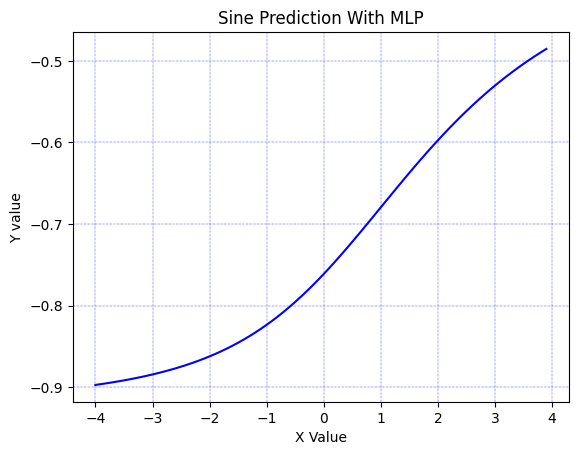

In [1]:
#MLP
#kb a lefutasi ido 24 perc, ha az epochs=100 000
import numpy as np
from keras.layers import Dense, Dropout, Activation
from keras.models import Sequential
import matplotlib.pyplot as plt

#input 1
x_train_MLP = np.arange(-4, 4, 0.1)
y_train_MLP = (np.sin(x_train_MLP))

#input 2
# min_x=-10
# max_x=20
# d_x=0.1  #lépés a bemeneti tér mintavételezésére
# a=4
# b=0.5
# #x + a * sin(b* x)
# x_train_MLP = np.arange(min_x, max_x, d_x)
# y_train_MLP = (x_train_MLP + a * np.sin(b * x_train_MLP))

MLP = Sequential()
MLP.add(Dense(10, input_dim=1, input_shape=(1,), activation='sigmoid'))
MLP.add(Dense(1, activation='sigmoid'))

MLP.compile(loss='mean_squared_error', optimizer='SGD', metrics=['mean_squared_error'])
MLP.fit(x_train_MLP, y_train_MLP, epochs=100, batch_size=8, verbose=1)

predicted_MLP = 2 * MLP.predict(x_train_MLP) - 1

plt.plot(x_train_MLP, predicted_MLP, 'b')
plt.title('Sine Prediction With MLP')
plt.ylabel('Y value')
plt.xlabel('X Value')
plt.grid(color='b', ls = '-.', lw = 0.25)
plt.savefig('mlp.png')
plt.show()

[22, 16, 76, 32, 49]


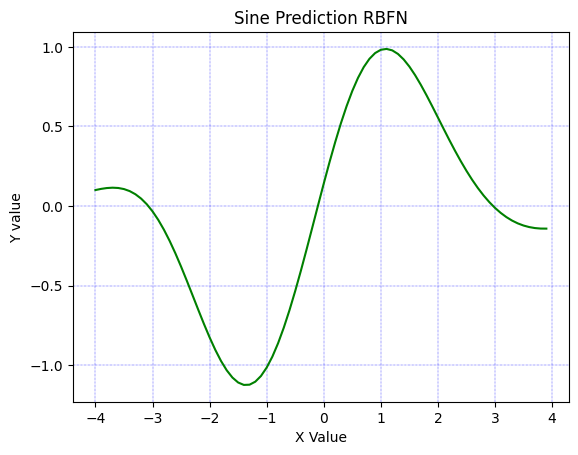

In [2]:
#RBF
import numpy as np
import matplotlib.pyplot as plt
import random

class RBF(object):

    def __init__(self, shape, sigma=0.5, centers = None, weights = None):
        self.shape = shape
        self.sigma = sigma
        self.centers = centers
        self.weights = weights

    def gaussian_kernel(self, center, data_point):
        return np.exp(-1 * self.sigma * (np.linalg.norm(center - data_point) ** 2))

    def interpolation_matrix(self, X):
        matrix = np.zeros(len(X) * self.shape)
        counter = 0
        for inp in X:
            for center in self.centers:
                kernel = self.gaussian_kernel(center, inp)
                matrix[counter] = kernel
                counter += 1
        return matrix.reshape(len(X), self.shape)

    def select_centers(self, X):
        centers = []
        # bsz=15  #bázisfüggvények száma
        # kozeppont = min_x : (max_x - min_x) / (bsz - 1) : max_x
        random_indices = random.sample(range(0, len(X)), self.shape)
        print(random_indices)
        for rnd in random_indices:
            centers.append(X[rnd])
        return np.array(centers)

    def fit(self, X, Y):
        # a bázis függvények, a súlyok beállítása és tanítás
        self.centers = self.select_centers(X)
        im = self.interpolation_matrix(X)
        self.weights = np.dot(np.linalg.pinv(im), Y)

    def predict(self, X):#tesztelés
        im = self.interpolation_matrix(X)
        predictions = np.dot(im, self.weights)
        return predictions

#input 1
x_train_RBF = np.arange(-4, 4, 0.1)
y_train_RBF = np.sin(x_train_RBF)

#input 2
# min_x=-10
# max_x=20
# d_x=0.1  #lépés a bemeneti tér mintavételezésére
# a=4
# b=0.5
# #x + a * sin(b* x)
# x_train_RBF = np.arange(min_x, max_x, d_x)
# y_train_RBF = x_train_RBF + a * np.sin(b * x_train_RBF)

RBFN = RBF(shape=5)
RBFN.fit(x_train_RBF, y_train_RBF)
y_pred_RBF = RBFN.predict(x_train_RBF)

plt.plot(x_train_RBF, y_pred_RBF, 'g-', label='predicted')
plt.title('Sine Prediction RBFN')
plt.ylabel('Y value')
plt.xlabel('X Value')
plt.grid(color='b', ls = '-.', lw = 0.25)
plt.savefig('rbf.png')
plt.show()

3/3 [==============================] - 0s 6ms/step


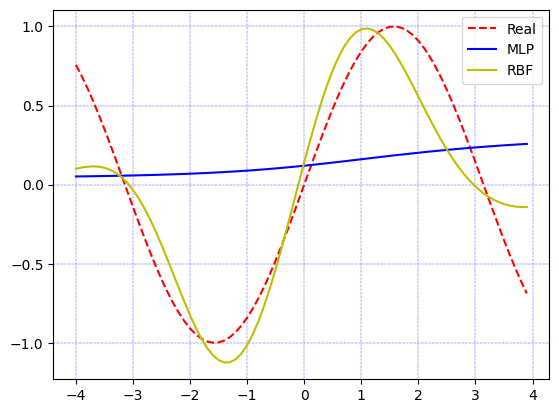

In [3]:
#COMPARE
#input 1
x_train_compare = np.arange(-4, 4, 0.1)

MLP_prediction = MLP.predict(x_train_compare)

RBF_prediction = RBFN.predict(x_train_compare)

real_values = np.sin(x_train_compare)

#input 2
# min_x=-10
# max_x=20
# d_x=0.1  #lépés a bemeneti tér mintavételezésére
# a=4
# b=0.5
# #x + a * sin(b* x)
# x_train_compare = np.arange(min_x, max_x, d_x)

# MLP_prediction = 2 * MLP.predict(x_train_compare) - 1

# RBF_prediction = RBFN.predict(x_train_compare)

# real_values = x_train_compare + a * np.sin(b * x_train_compare)


plt.plot(x_train_compare, real_values, 'r--', label='Real')
plt.plot(x_train_compare, MLP_prediction, 'b-', label='MLP')
plt.plot(x_train_compare, RBF_prediction, 'y-', label='RBF')

plt.legend(loc='upper right')
plt.grid(color='b', ls = '-.', lw = 0.25)
plt.savefig('compare.png')
plt.show()

Epoch 1/100
38/38 [==============================] - 0s 2ms/step - loss: 103.6752 - mean_squared_error: 103.6752
Epoch 2/100
38/38 [==============================] - 0s 1ms/step - loss: 101.2557 - mean_squared_error: 101.2557
Epoch 3/100
38/38 [==============================] - 0s 2ms/step - loss: 100.6371 - mean_squared_error: 100.6371
Epoch 4/100
38/38 [==============================] - 0s 2ms/step - loss: 100.3360 - mean_squared_error: 100.3360
Epoch 5/100
38/38 [==============================] - 0s 2ms/step - loss: 100.1702 - mean_squared_error: 100.1702
Epoch 6/100
38/38 [==============================] - 0s 2ms/step - loss: 100.0724 - mean_squared_error: 100.0724
Epoch 7/100
38/38 [==============================] - 0s 2ms/step - loss: 100.0084 - mean_squared_error: 100.0084
Epoch 8/100
38/38 [==============================] - 0s 2ms/step - loss: 99.9625 - mean_squared_error: 99.9625
Epoch 9/100
38/38 [==============================] - 0s 2ms/step - loss: 99.9279 - mean_squared_er

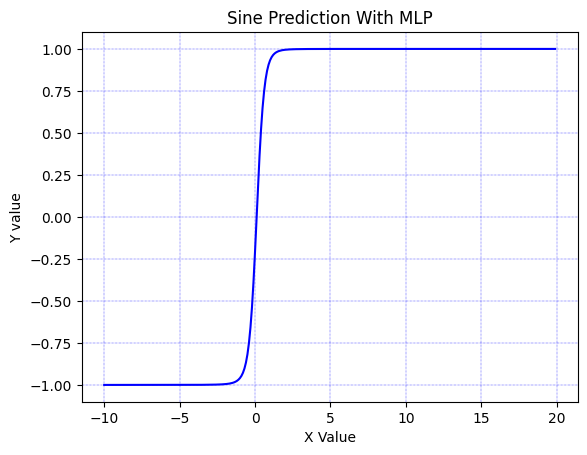

In [4]:
#MLP
#kb a lefutasi ido 24 perc, ha az epochs=100 000
import numpy as np
from keras.layers import Dense, Dropout, Activation
from keras.models import Sequential
import matplotlib.pyplot as plt

#input 1
# x_train_MLP = np.arange(-4, 4, 0.1)
# y_train_MLP = (np.sin(x_train_MLP))

#input 2
min_x=-10
max_x=20
d_x=0.1  #lépés a bemeneti tér mintavételezésére
a=4
b=0.5
#x + a * sin(b* x)
x_train_MLP = np.arange(min_x, max_x, d_x)
y_train_MLP = (x_train_MLP + a * np.sin(b * x_train_MLP))

MLP = Sequential()
MLP.add(Dense(10, input_dim=1, input_shape=(1,), activation='sigmoid'))
MLP.add(Dense(1, activation='sigmoid'))

MLP.compile(loss='mean_squared_error', optimizer='SGD', metrics=['mean_squared_error'])
MLP.fit(x_train_MLP, y_train_MLP, epochs=100, batch_size=8, verbose=1)

predicted_MLP = 2 * MLP.predict(x_train_MLP) - 1

plt.plot(x_train_MLP, predicted_MLP, 'b')
plt.title('Sine Prediction With MLP')
plt.ylabel('Y value')
plt.xlabel('X Value')
plt.grid(color='b', ls = '-.', lw = 0.25)
plt.savefig('mlp.png')
plt.show()